In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
 
n = 400
a = 0.025
x = np.random.normal(0, 1, n)
m = np.mean(x)
d = np.std(x, ddof=1)
 
print('Выборочное среднее', m)
print('Оценка среднеквадратического отклонения', d)

Выборочное среднее 0.036664529191855644
Оценка среднеквадратического отклонения 0.9400688318915064


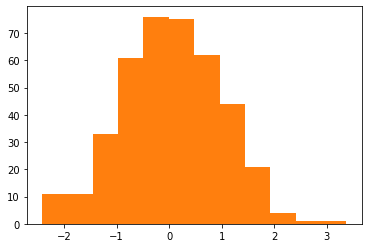

In [ ]:
k = math.floor(1.72 * (n ** (1/3)))
Nemp = plt.hist(x, bins = k)[0]
emp = plt.hist(x, bins = k)[1]
plt.show()

In [ ]:
z = np.zeros(k)
for i in range(k):
  z[i] = (emp[i] - m)/d
p = np.zeros(k-1)
Ntheory = np.zeros(k-1)
for i in range(k-1):
  p[i] = sts.norm.cdf(z[i+1]) - sts.norm.cdf(z[i])
  Ntheory[i] = n * p[i]

In [ ]:
print(p)

[0.01335113 0.03840328 0.08530024 0.14632348 0.19386276 0.19838546
 0.15680571 0.09572713 0.04513333 0.01643241 0.0046194 ]


In [ ]:
bord = sts.chi2.ppf(1-a, k-3)
chi2 = 0
for i in range (k-1):
  chi2 += (Nemp[i] - Ntheory[i])**2 / Ntheory[i]
 
print('Значение статистики:', chi2) 
print('Критическое значение:', bord)
 
if bord >= chi2:
  print('Гипотеза о нормальности ПРИНИМАЕТСЯ на уровне значимости', a)
else:
  print('Гипотеза о нормальности ОТВЕРГАЕТСЯ на уровне значимости', a)


Значение статистики: 10.383355949385678
Критическое значение: 19.02276779864163
Гипотеза о нормальности ПРИНИМАЕТСЯ на уровне значимости 0.025
